In [16]:
# import libraries

import pandas as pd
import seaborn as sns

In [3]:
# import data

df_delay = pd.read_excel("get_around_delay_analysis.xlsx")
df_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [8]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [9]:
df_delay.describe(include="all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


In [11]:
df_delay['checkin_type'].value_counts()

mobile     17003
connect     4307
Name: checkin_type, dtype: int64

<AxesSubplot: xlabel='checkin_type', ylabel='count'>

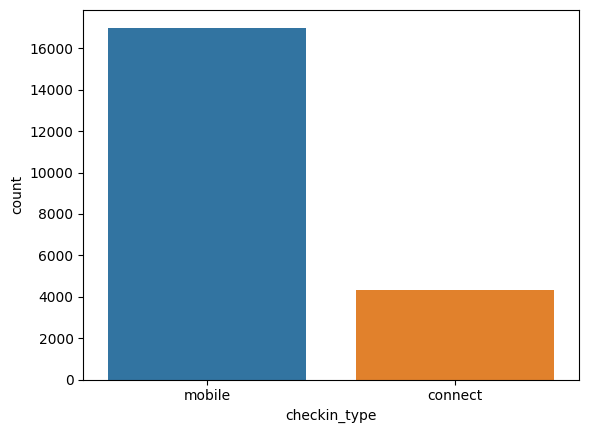

In [19]:
sns.countplot(x=df_delay['checkin_type'])


In [12]:
df_delay['state'].value_counts()

ended       18045
canceled     3265
Name: state, dtype: int64

<AxesSubplot: xlabel='state', ylabel='count'>

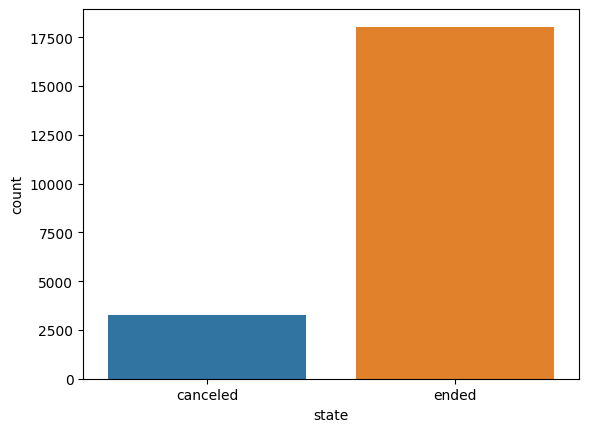

In [20]:
sns.countplot(x=df_delay['state'])

In [15]:
df_pricing = pd.read_csv("get_around_pricing_project.csv", index_col=0)
df_pricing

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True,121
4839,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True,132
4840,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True,130
4841,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True,151


In [8]:
df_delay.describe()

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,16346.000000,1841.000000,1841.000000
mean,549712.880338,350030.603426,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,67.000000,560823.000000,540.000000
max,576401.000000,417675.000000,71084.000000,575053.000000,720.000000


In [5]:
df_pricing.describe()

,Unnamed: 0,mileage,engine_power,rental_price_per_day
count,4843.000000,4.843000e+03,4843.00000,4843.000000
mean,2421.000000,1.409628e+05,128.98823,121.214536
std,1398.198007,6.019674e+04,38.99336,33.568268
min,0.000000,-6.400000e+01,0.00000,10.000000
25%,1210.500000,1.029135e+05,100.00000,104.000000
50%,2421.000000,1.410800e+05,120.00000,119.000000
75%,3631.500000,1.751955e+05,135.00000,136.000000
max,4842.000000,1.000376e+06,423.00000,422.000000
